In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')
%matplotlib inline

### Load the dataset

In [2]:
# Query the database to extract dataset:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM weatherinszeged', con=engine)

# Dispose the connection, as we're only doing a single query:
engine.dispose()

# Print out the head of the dataset:
df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Data cleaning & exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [4]:
df.describe()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
df.describe(include='object')

,summary,preciptype,dailysummary
count,96453,96453,96453
unique,27,3,214
top,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,31733,85224,20085


In [6]:
df.corr()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
temperature,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
apparenttemperature,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
windspeed,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
windbearing,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
visibility,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
loudcover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


### Regression model
#### Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

In [7]:
import statsmodels.api as sm

Y = df['temperature']
X = df[['humidity', 'windspeed', 'windbearing', 'pressure']]

# Manually add a constant in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Mon, 06 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:08:28   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check to see if the model meets the Gauss-Markov Conditions
#### Assumption one -  linearity of the model in its coefficients: the target variable should be a linear function of the model's coefficients.
In principle, this assumption is not related to estimation but to how we specify our model. So as long as we use models that take into account this linearity assumption, then we shouldn't worry about this assumption at all.
In our model above, we did assume the linearity of coefficients.

#### Assumption two - the error term should be zero on average

In [8]:
# We create a LinearRegression model object from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the temperature model is: {}".format(np.mean(errors)))

Mean of the errors in the temperature model is: -1.128114497783652e-14


As we can see, the errors term of our model is very minimal. Since, we include the constant term in the model, the average of the model's error is effectively zero.

#### Assumption three - homoscedasticity: A model is homoscedastic when the distribution of its error terms (known as "scedasticity") is consistent for all predicted values. 

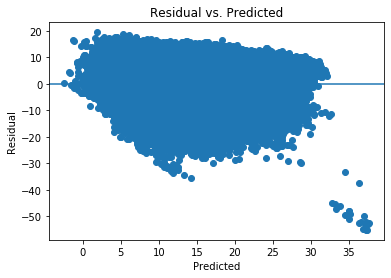

In [9]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

It seems that error variance is lower for the higher values of the target variable. This implies that our error terms aren't homoscedastic. To test this out, we'll use Bartlett and Levene tests. The null hypothesis for both tests is that the errors are homoscedastic.

In [10]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic(not homoscedastic)

#### Assumption four - low multicollinearity: Individual features should be only weakly correlated with one another, and ideally completely uncorrelated

In [11]:
df[['humidity', 'windspeed', 'windbearing', 'pressure', 'temperature']].corr()

,humidity,windspeed,windbearing,pressure,temperature
humidity,1.000000,-0.224951,0.000735,0.005454,-0.632255
windspeed,-0.224951,1.000000,0.103822,-0.049263,0.008957
windbearing,0.000735,0.103822,1.000000,-0.011651,0.029988
pressure,0.005454,-0.049263,-0.011651,1.000000,-0.005447
temperature,-0.632255,0.008957,0.029988,-0.005447,1.000000


As we can see from the correlation matrix above, temperature and humidity are quite highly correlated. This means low multicollinearity assumption doesn't hold true in this case.

#### Assumption five - error terms should be uncorrelated with one another: the error term for one observation shouldn't predict the error term for another.

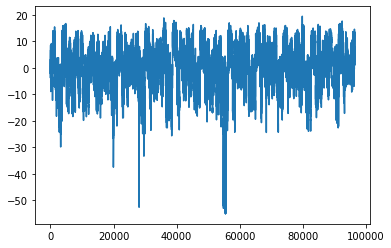

In [12]:
# Check out the temperature model's errors:
plt.plot(errors)
plt.show()

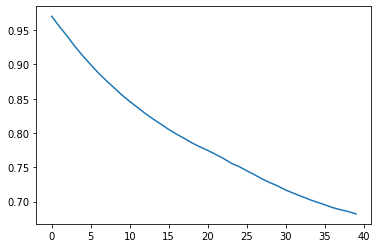

In [13]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

The error terms range between 0.5 to 1 in this case

#### Assumption six - features shouldn't be correlated with the errors: explanatory variables and errors should be independent

In [14]:
errors= pd.DataFrame(errors)
errors

,temperature
0,2.997429
1,1.903019
2,1.041150
3,-0.210907
4,-0.319812
...,...
96448,4.854613
96449,4.909583
96450,4.700950
96451,5.836123


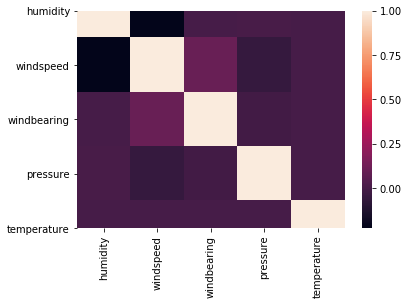

In [15]:
df_errors = df[['humidity', 'windspeed', 'windbearing', 'pressure']]
df_errors = df_errors.join(errors)
sns.heatmap(df_errors.corr())

From the heatmap above, it looks like error terms (temperature) have very small correlation to other explanatory variables, which means our assumption is met.

#### Let's inspect the normality of error terms because even though it is not required to apply OLS to a linear regression model,  in order to measure the statistical significance of our estimated coefficients, error terms must be normally distributed.

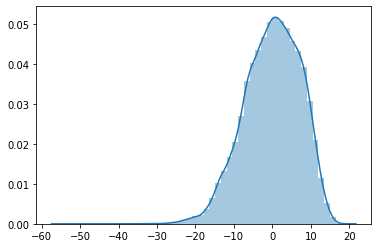

In [16]:
sns.distplot(errors)

In [20]:
# Apply Jarque Bera and normal tests to check if error terms are normally distributed.
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print('Jarque-Bera test statistics is {0:3g} and p value is {1:.3g}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.3 and p value is 0
Normality test statistics is [3375.4323077] and p value is [0.]


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are not normally distributed.